# *Cosmic shear* 2PCF
### $N^2$ method tests

This nb computes simple correlations of *shear (WL)* between N objects by the rudimentary logical form.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
# import scipy as sp

# randoms_arr = np.arange()
# Num = 4 #len(randoms_arr)

# Tests
### Test 1

In [2]:
import random

Num = 80; bins = 10 # originally 200 pts

rx = np.zeros(Num)
ry = np.zeros(Num)
for i in range(Num):
    rx[i] = random.uniform(-1,1)
    ry[i] = random.uniform(-1,1)

print(rx, '\n', ry)

[-0.74939024  0.80367883  0.41629652 -0.75654513  0.53653567 -0.43304792
  0.72800305  0.57690944  0.91011535  0.02815545  0.9886892  -0.39661778
  0.29999179 -0.58195682 -0.11413739  0.08229752 -0.93246182 -0.03745869
 -0.67224766  0.32885231 -0.34938092  0.88542635  0.38491406  0.60030655
  0.72089068 -0.68421194  0.39148197  0.43105918  0.99950466  0.98085735
 -0.98397661  0.62689715  0.55004333 -0.66276727  0.32879448  0.59367589
 -0.93029644 -0.26138538 -0.39259962 -0.61835319 -0.42046332  0.15181142
 -0.73448642  0.8213232  -0.67978968  0.81433833  0.24114514 -0.12232356
  0.61810206  0.4757049  -0.83208241  0.32376165  0.57983346  0.87170091
 -0.83486704  0.42642932 -0.33734198 -0.69750435  0.48310925  0.67210195
 -0.61968651 -0.86355343  0.94702649 -0.12238589  0.34667006 -0.51659325
 -0.81443724  0.92105598  0.50365183  0.46874494 -0.01087665 -0.14158088
 -0.25478424 -0.94387224  0.05028605  0.88726908 -0.2596646  -0.19209191
 -0.62880783 -0.16997212] 
 [ 0.90214122 -0.1499405

In [3]:
# angle_arr = angle + np.arctan(ry/rx)
def angle_f(angle, x,y):
    return angle + np.arctan(y/x)

angle = np.pi/4

# size_arr = np.sqrt(rx**2 + ry**2)
def size_f(x,y):
    return np.sqrt(x**2 + y**2)

points_T1 = np.concatenate((rx.reshape(-1,1), ry.reshape(-1,1), size_f(rx,ry).reshape(-1,1), angle_f(angle, rx,ry).reshape(-1,1)), axis = 1)
points_T1;

In [4]:
# PLOTTING PARAMETERS #

size = 0.1; #imagesize =  400;
# xT = points_T1[:,0] # rx
# yT = points_T1[:,1] # ry
# lp = np.concatenate((rx.reshape(-1,1), ry.reshape(-1,1)), axis = 1)

xmin = np.min(rx)*1.01
xmax = np.max(rx)*1.01
ymin = np.min(ry)*1.01
ymax = np.max(ry)*1.01

AbsgshapeT = points_T1[:,2] # size_f(rx, ry) = size_arr
AnglegshapeT = points_T1[:,3] # angle_f(rx, ry) = angle_arr

In [5]:
# constructing the orientation lines of the galaxies with the distances and angles generated
x_ofline1 = np.zeros(Num); y_ofline1 = np.zeros(Num)
x_ofline2 = np.zeros(Num); y_ofline2 = np.zeros(Num)

for ii in range(Num):
    x_ofline1[ii] = rx[ii] - (size*AbsgshapeT[ii]/2)*np.cos(AnglegshapeT[ii]) # abscissa 1
    y_ofline1[ii] = ry[ii] - (size*AbsgshapeT[ii]/2)*np.sin(AnglegshapeT[ii]) # ordinate 1
    x_ofline2[ii] = rx[ii] + (size*AbsgshapeT[ii]/2)*np.cos(AnglegshapeT[ii]) # abscissa 2
    y_ofline2[ii] = ry[ii] + (size*AbsgshapeT[ii]/2)*np.sin(AnglegshapeT[ii]) # ordinate 2
    
line_of_point1 = np.concatenate((x_ofline1.reshape(-1,1), y_ofline1.reshape(-1,1)), axis = 1)
line_of_point2 = np.concatenate((x_ofline2.reshape(-1,1), y_ofline2.reshape(-1,1)), axis = 1)

print(line_of_point1, '\n\n',line_of_point2)

[[-0.80778069  0.90754178]
 [ 0.76996329 -0.1730537 ]
 [ 0.37019859 -0.87088851]
 [-0.76933928 -0.43537349]
 [ 0.53305603  0.40365738]
 [-0.44468098 -0.12300325]
 [ 0.68030491 -0.62488364]
 [ 0.56528991  0.21908537]
 [ 0.90747204  0.77363977]
 [ 0.04398924  0.45817788]
 [ 0.97572458  0.56504823]
 [-0.44197875  0.90369999]
 [ 0.30873724  0.51739243]
 [-0.60558011  0.06868359]
 [-0.11965129  0.0392624 ]
 [ 0.10694136  0.74886746]
 [-0.97686244  0.30184307]
 [-0.00747629 -0.91812028]
 [-0.66673914 -0.88109561]
 [ 0.29142015 -0.71571047]
 [-0.35663518 -0.16165022]
 [ 0.84211815 -0.35881545]
 [ 0.33924108 -0.8884576 ]
 [ 0.59882585  0.51745869]
 [ 0.7265033   0.82305224]
 [-0.71289587  0.10739501]
 [ 0.39248477  0.39116068]
 [ 0.44279372  0.72074721]
 [ 0.92907425 -0.99281331]
 [ 0.93294467 -0.39576228]
 [-0.99559624 -0.71328188]
 [ 0.6194474   0.3793078 ]
 [ 0.53055253 -0.02064274]
 [-0.70140199  0.42175755]
 [ 0.29247791 -0.68532599]
 [ 0.54058528 -0.89684197]
 [-0.94415538 -0.59022939]
 

In [6]:
x_values = [line_of_point1[:,0], line_of_point2[:,0]]
y_values = [line_of_point1[:,1], line_of_point2[:,1]]

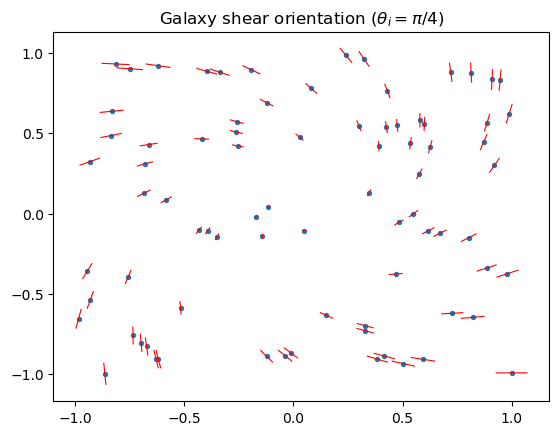

In [7]:
# for i in range(0, len(x_values)//2):
#     x = [x_values[i],x_values[len(x_values)//2 + i]]
#     y = [y_values[i],y_values[len(x_values)//2 + i]]
#     plt.plot(x_values[i:i+2], y_values[i:i+2], 'ro-')

plt.plot(x_values, y_values, 'r-', linewidth=.8)
plt.scatter(rx,ry, s=8)
plt.title(r'Galaxy shear orientation ($\theta_i = \pi/4$)')
plt.show()

### Correlation functions $\xi_{tt}(\theta)$, $\xi_{\times \times}(\theta)$, $\xi_{\times t}(\theta)$

In [8]:
coordx = np.zeros(Num*(Num-1)//2); #coordy = coordx; coordz = coordx
distance_xis1 = np.concatenate((coordx.reshape(-1,1), coordx.reshape(-1,1), coordx.reshape(-1,1), coordx.reshape(-1,1)), axis = 1)

n = 0

for i in range(Num):
    p1x1 = rx[i]
    p1x2 = ry[i]
    p1Absgamma = AbsgshapeT[i]
    p1Anglegamma = AnglegshapeT[i]
    
    p1_gamma = p1Absgamma*np.exp(2j*p1Anglegamma)
    for m in range(i+1, Num):
        p2x1 = rx[m]
        p2x2 = ry[m]
        p2Absgamma = AbsgshapeT[m]
        p2Anglegamma = AnglegshapeT[m]

        p2_gamma = p2Absgamma*np.exp(2j*p2Anglegamma)
        
        if (p2x1 - p1x1) != 0:
            angle_pair = np.arctan((p2x2 - p1x2)/(p2x1 - p1x1))
        else:
            angle_pair = np.pi/2
            
        p1_gammahelicity = -p1_gamma*np.exp(-2j*angle_pair)
        p2_gammahelicity = -p2_gamma*np.exp(-2j*angle_pair)
        
        p1_gamma_t = np.real(p1_gammahelicity)
        p1_gamma_X = np.imag(p1_gammahelicity)
        p2_gamma_t = np.real(p2_gammahelicity)
        p2_gamma_X = np.imag(p2_gammahelicity)
        
        distance = np.sqrt((p2x2 - p1x2)**2 + (p2x1 - p1x1)**2)
        
        xi_tt = p1_gamma_t*p2_gamma_t
        xi_xx = p1_gamma_X*p2_gamma_X
        xi_tx = p1_gamma_t*p2_gamma_X
        
        distance_xis1[n] = [distance, xi_tt, xi_xx, xi_tx]
        
        n += 1

In [9]:
# output
distance_xis1

array([[ 1.87587302, -0.37568016,  0.55152097,  0.34918921],
       [ 2.13584168, -0.07232581,  1.07619556, -0.25393183],
       [ 1.29683278, -0.81462806, -0.09723112,  0.55503077],
       ...,
       [ 1.85421987, -0.53153542,  0.46605722, -0.5849036 ],
       [ 0.91472738, -0.00971907, -0.14370395,  0.05641913],
       [ 0.99917935,  0.04452805, -0.07060308, -0.01870134]])

In [10]:
max_dist = np.max([distance_xis1[:,0], distance_xis1[:,1]])

list1 = np.zeros(bins+1)
for i in range(bins+1):
    list1[i] = max_dist*i/bins

hist_xitt = np.zeros(bins)
hist_xixx = np.zeros(bins)
hist_xitx = np.zeros(bins)
num_bin = np.zeros(bins)

for i in range(len(distance_xis1)):
    dist = distance_xis1[i, 0]
    xitt = distance_xis1[i, 1]
    xixx = distance_xis1[i, 2]
    xitx = distance_xis1[i, 3]
    for j in range(bins):
        if (list1[j] < dist) and (dist <= list1[j+1]):
            hist_xitt[j] = hist_xitt[j] + xitt
            hist_xixx[j] = hist_xixx[j] + xixx
            hist_xitx[j] = hist_xitx[j] + xitx
            num_bin[j] = num_bin[j] + 1

hist_xitt = hist_xitt/num_bin
hist_xixx = hist_xixx/num_bin
hist_xitx = hist_xitx/num_bin

In [11]:
# output
xi_tt_xx_tx = np.concatenate((hist_xitt.reshape(-1,1), hist_xixx.reshape(-1,1), hist_xitx.reshape(-1,1), num_bin.reshape(-1,1)), axis = 1)
xi_tt_xx_tx

array([[ 3.37506672e-01,  3.36543713e-01, -4.49345014e-02,
         1.39000000e+02],
       [ 2.58132578e-01,  2.53562925e-01, -2.65109285e-02,
         3.39000000e+02],
       [ 1.18525303e-02,  9.85910082e-02,  2.40039001e-02,
         4.54000000e+02],
       [-1.71176512e-01, -2.76489574e-02,  1.89426791e-02,
         5.15000000e+02],
       [-3.93871172e-01,  1.97563633e-03,  1.77843222e-02,
         5.30000000e+02],
       [-4.74163592e-01,  1.63066230e-01,  1.35220870e-03,
         4.79000000e+02],
       [-4.91973884e-01,  3.60294830e-01, -2.63195495e-03,
         4.16000000e+02],
       [-2.98669573e-01,  7.26349717e-01,  9.71433427e-03,
         2.02000000e+02],
       [-1.00214998e-01,  1.15907200e+00, -4.06845510e-02,
         7.50000000e+01],
       [-3.21741370e-02,  1.54058574e+00,  3.48379652e-02,
         1.10000000e+01]])

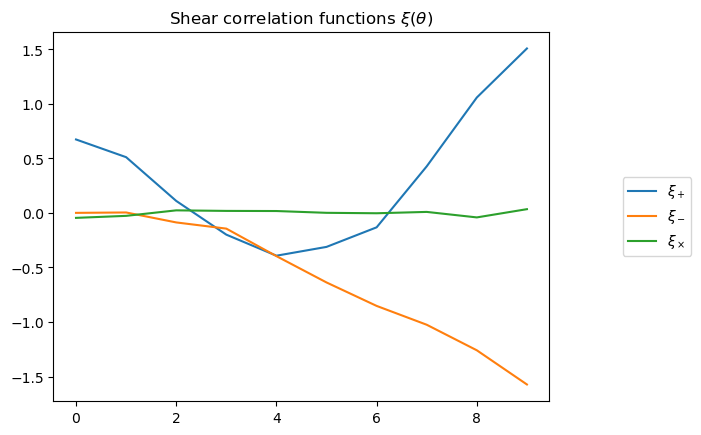

In [12]:
xis_1 = xi_tt_xx_tx

plt.plot(xis_1[:,0] + xis_1[:,1], label=r'$\xi_+$')
plt.plot(xis_1[:,0] - xis_1[:,1], label=r'$\xi_-$')
plt.plot(xis_1[:,2], label=r'$\xi_\times$')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5))
plt.title(r'Shear correlation functions $\xi(\theta)$')
plt.show()

### Test 2

In [13]:
rx = np.zeros(Num)
ry = np.zeros(Num)
for i in range(Num):
    rx[i] = random.uniform(-1,1)
    ry[i] = random.uniform(-1,1)

angle2 = 0
points_T2 = np.concatenate((rx.reshape(-1,1), ry.reshape(-1,1), size_f(rx,ry).reshape(-1,1), angle_f(angle2, rx,ry).reshape(-1,1)), axis = 1)

AbsgshapeT2 = points_T2[:,2] # size_f(rx, ry) = size_arr
AnglegshapeT2 = points_T2[:,3] # angle_f(rx, ry) = angle_arr

In [14]:
x_ofline1_2 = np.zeros(Num); y_ofline1_2 = np.zeros(Num)
x_ofline2_2 = np.zeros(Num); y_ofline2_2 = np.zeros(Num)

for ii in range(Num):
    x_ofline1_2[ii] = rx[ii] - (size*AbsgshapeT2[ii]/2)*np.cos(AnglegshapeT2[ii]) # abscissa 1
    y_ofline1_2[ii] = ry[ii] - (size*AbsgshapeT2[ii]/2)*np.sin(AnglegshapeT2[ii]) # ordinate 1
    x_ofline2_2[ii] = rx[ii] + (size*AbsgshapeT2[ii]/2)*np.cos(AnglegshapeT2[ii]) # abscissa 2
    y_ofline2_2[ii] = ry[ii] + (size*AbsgshapeT2[ii]/2)*np.sin(AnglegshapeT2[ii]) # ordinate 2
    
line_of_point1_2 = np.concatenate((x_ofline1_2.reshape(-1,1), y_ofline1_2.reshape(-1,1)), axis = 1)
line_of_point2_2 = np.concatenate((x_ofline2_2.reshape(-1,1), y_ofline2_2.reshape(-1,1)), axis = 1)

x_values_2 = [line_of_point1_2[:,0], line_of_point2_2[:,0]]
y_values_2 = [line_of_point1_2[:,1], line_of_point2_2[:,1]]

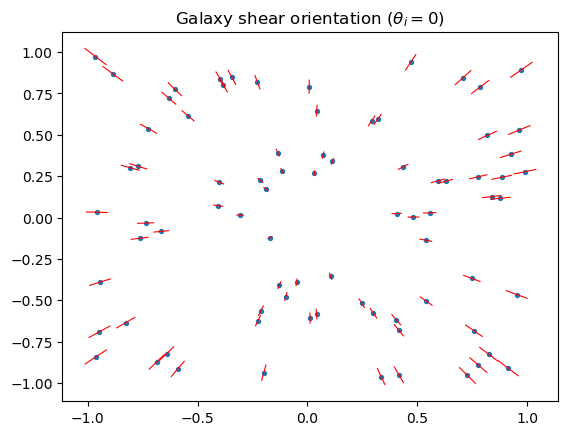

In [15]:
# PLOTTING

plt.plot(x_values_2, y_values_2, 'r-', linewidth=.8)
plt.scatter(rx,ry, s=8)
plt.title(r'Galaxy shear orientation ($\theta_i = 0$)')
plt.show()

### Test 3: Randon (angle and size)

In [16]:
rx = np.zeros(Num)
ry = np.zeros(Num)
for i in range(Num):
    rx[i] = random.uniform(-1,1)
    ry[i] = random.uniform(-1,1)

size_f3 = np.zeros(Num)
angle_f3 = np.zeros(Num)
angle3 = 0

for i in range(Num):
    size_f3[i] = random.uniform(0,0.9)
    angle_f3[i] = angle3 + random.uniform(0,np.pi)

points_T3 = np.concatenate((rx.reshape(-1,1), ry.reshape(-1,1), size_f3.reshape(-1,1), angle_f3.reshape(-1,1)), axis = 1)

AbsgshapeT3 = points_T3[:,2] # size_f(rx, ry) = size_arr
AnglegshapeT3 = points_T3[:,3] # angle_f(rx, ry) = angle_arr

In [17]:
x_ofline1_3 = np.zeros(Num); y_ofline1_3 = np.zeros(Num)
x_ofline2_3 = np.zeros(Num); y_ofline2_3 = np.zeros(Num)

for ii in range(Num):
    x_ofline1_3[ii] = rx[ii] - (size*AbsgshapeT3[ii]/2)*np.cos(AnglegshapeT3[ii]) # abscissa 1
    y_ofline1_3[ii] = ry[ii] - (size*AbsgshapeT3[ii]/2)*np.sin(AnglegshapeT3[ii]) # ordinate 1
    x_ofline2_3[ii] = rx[ii] + (size*AbsgshapeT3[ii]/2)*np.cos(AnglegshapeT3[ii]) # abscissa 2
    y_ofline2_3[ii] = ry[ii] + (size*AbsgshapeT3[ii]/2)*np.sin(AnglegshapeT3[ii]) # ordinate 2
    
line_of_point1_3 = np.concatenate((x_ofline1_3.reshape(-1,1), y_ofline1_3.reshape(-1,1)), axis = 1)
line_of_point2_3 = np.concatenate((x_ofline2_3.reshape(-1,1), y_ofline2_3.reshape(-1,1)), axis = 1)

x_values_3 = [line_of_point1_3[:,0], line_of_point2_3[:,0]]
y_values_3 = [line_of_point1_3[:,1], line_of_point2_3[:,1]]

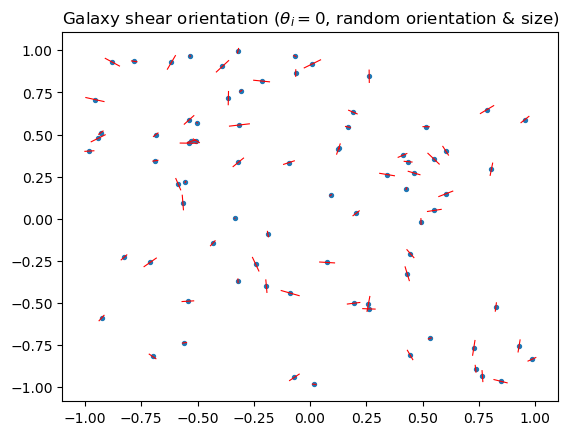

In [18]:
# PLOTTING

plt.plot(x_values_3, y_values_3, 'r-', linewidth=.8)
plt.scatter(rx,ry, s=8)
plt.title(r'Galaxy shear orientation ($\theta_i = 0$, random orientation & size)')
plt.show()

##### Correlation functions $\xi_{tt}(\theta)$, $\xi_{\times \times}(\theta)$, $\xi_{\times t}(\theta)$
(for test 3, random)

In [19]:
bins3 = 20
distance_xis3 = np.concatenate((coordx.reshape(-1,1), coordx.reshape(-1,1), coordx.reshape(-1,1), coordx.reshape(-1,1)), axis = 1)

n = 0

for i in range(Num):
    p1x1 = rx[i]
    p1x2 = ry[i]
    p1Absgamma = AbsgshapeT[i]
    p1Anglegamma = AnglegshapeT[i]
    
    p1_gamma = p1Absgamma*np.exp(2j*p1Anglegamma)
    for m in range(i+1, Num):
        p2x1 = rx[m]
        p2x2 = ry[m]
        p2Absgamma = AbsgshapeT[m]
        p2Anglegamma = AnglegshapeT[m]

        p2_gamma = p2Absgamma*np.exp(2j*p2Anglegamma)
        
        if (p2x1 - p1x1) != 0:
            angle_pair = np.arctan((p2x2 - p1x2)/(p2x1 - p1x1))
        else:
            angle_pair = np.pi/2
            
        p1_gammahelicity = -p1_gamma*np.exp(-2j*angle_pair)
        p2_gammahelicity = -p2_gamma*np.exp(-2j*angle_pair)
        
        p1_gamma_t = np.real(p1_gammahelicity)
        p1_gamma_X = np.imag(p1_gammahelicity)
        p2_gamma_t = np.real(p2_gammahelicity)
        p2_gamma_X = np.imag(p2_gammahelicity)
        
        distance = np.sqrt((p2x2 - p1x2)**2 + (p2x1 - p1x1)**2)
        
        xi_tt = p1_gamma_t*p2_gamma_t
        xi_xx = p1_gamma_X*p2_gamma_X
        xi_tx = p1_gamma_t*p2_gamma_X
        
        distance_xis3[n] = [distance, xi_tt, xi_xx, xi_tx]
        
        n += 1

# output
distance_xis3

array([[ 3.80020424e-01,  3.21990385e-01, -1.46149572e-01,
         8.89655369e-01],
       [ 1.70367435e+00,  8.93723480e-01,  1.10146275e-01,
        -7.00905245e-01],
       [ 1.03657109e+00,  3.00219668e-02, -9.41881148e-01,
         8.68910519e-02],
       ...,
       [ 8.23460961e-01, -5.27202186e-01,  4.61723986e-01,
        -4.00227152e-01],
       [ 4.90549852e-01, -2.09597476e-02, -1.32463277e-01,
        -3.91866611e-02],
       [ 4.58344168e-01, -2.96948722e-02,  3.61984352e-03,
        -5.77191656e-04]])

In [20]:
max_dist3 = np.max([distance_xis3[:,0], distance_xis3[:,1]])

list3 = np.zeros(bins3+1)
for i in range(bins3+1):
    list3[i] = max_dist3*i/bins3

hist_xitt3 = np.zeros(bins3)
hist_xixx3 = np.zeros(bins3)
hist_xitx3 = np.zeros(bins3)
num_bin3 = np.zeros(bins3)

for i in range(len(distance_xis3)):
    dist = distance_xis3[i, 0]
    xitt = distance_xis3[i, 1]
    xixx = distance_xis3[i, 2]
    xitx = distance_xis3[i, 3]
    for j in range(bins3):
        if (list3[j] < dist) and (dist <= list3[j+1]):
            hist_xitt3[j] = hist_xitt3[j] + xitt
            hist_xixx3[j] = hist_xixx3[j] + xixx
            hist_xitx3[j] = hist_xitx3[j] + xitx
            num_bin3[j] = num_bin3[j] + 1

hist_xitt3 = hist_xitt3/num_bin3
hist_xixx3 = hist_xixx3/num_bin3
hist_xitx3 = hist_xitx3/num_bin3

# output
xi_tt_xx_tx3 = np.concatenate((hist_xitt3.reshape(-1,1), hist_xixx3.reshape(-1,1), hist_xitx3.reshape(-1,1), num_bin3.reshape(-1,1)), axis = 1)
xi_tt_xx_tx3

array([[-4.58920547e-02,  4.62095850e-03,  7.09375121e-02,
         4.90000000e+01],
       [-9.03515140e-02,  4.37919695e-02,  2.91350613e-02,
         1.13000000e+02],
       [-2.61443316e-02,  2.29288501e-02, -2.47647962e-02,
         1.78000000e+02],
       [-4.98606993e-02, -1.67235019e-02, -1.98176803e-02,
         2.34000000e+02],
       [ 2.70756746e-02,  1.23203216e-02,  5.60198704e-03,
         2.38000000e+02],
       [ 2.20193199e-02, -4.28033166e-03, -1.95614429e-02,
         2.70000000e+02],
       [-1.03976649e-02,  3.11738996e-02,  2.34446656e-02,
         2.81000000e+02],
       [ 2.17371412e-02,  9.94264621e-03,  9.85450773e-03,
         2.91000000e+02],
       [ 1.06506460e-02, -5.54101987e-02,  4.35027589e-02,
         3.00000000e+02],
       [ 6.78995187e-03,  1.89920637e-02, -1.51966202e-02,
         2.57000000e+02],
       [-3.89202180e-02,  3.28936950e-02,  8.40277998e-03,
         2.46000000e+02],
       [ 3.82675863e-03, -3.69725838e-02,  4.66426967e-03,
      

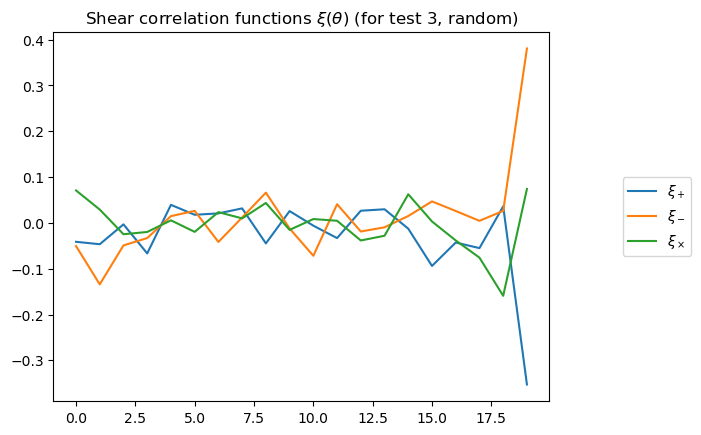

In [21]:
# PLOTTING xi

xis_3 = xi_tt_xx_tx3

plt.plot(xis_3[:,0] + xis_3[:,1], label=r'$\xi_+$')
plt.plot(xis_3[:,0] - xis_3[:,1], label=r'$\xi_-$')
plt.plot(xis_3[:,2], label=r'$\xi_\times$')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5))
plt.title(r'Shear correlation functions $\xi(\theta)$ (for test 3, random)')
plt.show()

## Test angles

This section of the code is for reviewing 

In [22]:
### 1st sample (for angle_1)

angles_arr = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4])
Num = 300
size_fangles = np.full(Num, .35)#1/np.sqrt(2))
# bins3 = 20

rx1 = np.zeros(Num)
ry1 = np.zeros(Num)
for i in range(Num):
    rx1[i] = random.uniform(-1,1)
    ry1[i] = random.uniform(-1,1)

angle = angles_arr[0]
print('Angle =', angle)

# Sample (for angle_1)
points_angle1 = np.concatenate((rx1.reshape(-1,1), ry1.reshape(-1,1), size_fangles.reshape(-1,1), angle_f(angle, rx1,ry1).reshape(-1,1)), axis = 1)

Absgshape_angle1 = points_angle1[:,2] # size_f(rx, ry) = size_arr
Anglegshape_angle1 = points_angle1[:,3] # angle_f(rx, ry) = angle_arr

Angle = 0.0


In [23]:
x_ofline1_a1 = np.zeros(Num); y_ofline1_a1 = np.zeros(Num)
x_ofline2_a1 = np.zeros(Num); y_ofline2_a1 = np.zeros(Num)

for ii in range(Num):
    x_ofline1_a1[ii] = rx1[ii] - (size_fangles[ii]*Absgshape_angle1[ii]/2)*np.cos(Anglegshape_angle1[ii]) # abscissa 1
    y_ofline1_a1[ii] = ry1[ii] - (size_fangles[ii]*Absgshape_angle1[ii]/2)*np.sin(Anglegshape_angle1[ii]) # ordinate 1
    x_ofline2_a1[ii] = rx1[ii] + (size_fangles[ii]*Absgshape_angle1[ii]/2)*np.cos(Anglegshape_angle1[ii]) # abscissa 2
    y_ofline2_a1[ii] = ry1[ii] + (size_fangles[ii]*Absgshape_angle1[ii]/2)*np.sin(Anglegshape_angle1[ii]) # ordinate 2
    
line_of_point1_a1 = np.concatenate((x_ofline1_a1.reshape(-1,1), y_ofline1_a1.reshape(-1,1)), axis = 1)
line_of_point2_a1 = np.concatenate((x_ofline2_a1.reshape(-1,1), y_ofline2_a1.reshape(-1,1)), axis = 1)

x_values_a1 = [line_of_point1_a1[:,0], line_of_point2_a1[:,0]]
y_values_a1 = [line_of_point1_a1[:,1], line_of_point2_a1[:,1]]

In [24]:
#### 2nd sample (for angle_2)

rx2 = np.zeros(Num)
ry2 = np.zeros(Num)
for i in range(Num):
    rx2[i] = random.uniform(-1,1)
    ry2[i] = random.uniform(-1,1)

angle = angles_arr[1]
print('Angle =', angle)

points_angle2 = np.concatenate((rx2.reshape(-1,1), ry2.reshape(-1,1), size_fangles.reshape(-1,1), angle_f(angle, rx2,ry2).reshape(-1,1)), axis = 1)

Absgshape_angle2 = points_angle2[:,2] # size_f(rx, ry) = size_arr
Anglegshape_angle2 = points_angle2[:,3] # angle_f(rx, ry) = angle_arr


x_ofline1_a2 = np.zeros(Num); y_ofline1_a2 = np.zeros(Num)
x_ofline2_a2 = np.zeros(Num); y_ofline2_a2 = np.zeros(Num)

for ii in range(Num):
    x_ofline1_a2[ii] = rx2[ii] - (size_fangles[ii]*Absgshape_angle2[ii]/2)*np.cos(Anglegshape_angle2[ii]) # abscissa 1
    y_ofline1_a2[ii] = ry2[ii] - (size_fangles[ii]*Absgshape_angle2[ii]/2)*np.sin(Anglegshape_angle2[ii]) # ordinate 1
    x_ofline2_a2[ii] = rx2[ii] + (size_fangles[ii]*Absgshape_angle2[ii]/2)*np.cos(Anglegshape_angle2[ii]) # abscissa 2
    y_ofline2_a2[ii] = ry2[ii] + (size_fangles[ii]*Absgshape_angle2[ii]/2)*np.sin(Anglegshape_angle2[ii]) # ordinate 2
    
line_of_point1_a2 = np.concatenate((x_ofline1_a2.reshape(-1,1), y_ofline1_a2.reshape(-1,1)), axis = 1)
line_of_point2_a2 = np.concatenate((x_ofline2_a2.reshape(-1,1), y_ofline2_a2.reshape(-1,1)), axis = 1)

x_values_a2 = [line_of_point1_a2[:,0], line_of_point2_a2[:,0]]
y_values_a2 = [line_of_point1_a2[:,1], line_of_point2_a2[:,1]]

Angle = 0.7853981633974483


In [25]:
#### 3rd sample (for angle_3)

rx3 = np.zeros(Num)
ry3 = np.zeros(Num)
for i in range(Num):
    rx3[i] = random.uniform(-1,1)
    ry3[i] = random.uniform(-1,1)

angle = angles_arr[2]
print('Angle =', angle)

points_angle3 = np.concatenate((rx3.reshape(-1,1), ry3.reshape(-1,1), size_fangles.reshape(-1,1), angle_f(angle, rx3,ry3).reshape(-1,1)), axis = 1)

Absgshape_angle3 = points_angle3[:,2] # size_f(rx, ry) = size_arr
Anglegshape_angle3 = points_angle3[:,3] # angle_f(rx, ry) = angle_arr


x_ofline1_a3 = np.zeros(Num); y_ofline1_a3 = np.zeros(Num)
x_ofline2_a3 = np.zeros(Num); y_ofline2_a3 = np.zeros(Num)

for ii in range(Num):
    x_ofline1_a3[ii] = rx3[ii] - (size_fangles[ii]*Absgshape_angle3[ii]/2)*np.cos(Anglegshape_angle3[ii]) # abscissa 1
    y_ofline1_a3[ii] = ry3[ii] - (size_fangles[ii]*Absgshape_angle3[ii]/2)*np.sin(Anglegshape_angle3[ii]) # ordinate 1
    x_ofline2_a3[ii] = rx3[ii] + (size_fangles[ii]*Absgshape_angle3[ii]/2)*np.cos(Anglegshape_angle3[ii]) # abscissa 2
    y_ofline2_a3[ii] = ry3[ii] + (size_fangles[ii]*Absgshape_angle3[ii]/2)*np.sin(Anglegshape_angle3[ii]) # ordinate 2
    
line_of_point1_a3 = np.concatenate((x_ofline1_a3.reshape(-1,1), y_ofline1_a3.reshape(-1,1)), axis = 1)
line_of_point2_a3 = np.concatenate((x_ofline2_a3.reshape(-1,1), y_ofline2_a3.reshape(-1,1)), axis = 1)

x_values_a3 = [line_of_point1_a3[:,0], line_of_point2_a3[:,0]]
y_values_a3 = [line_of_point1_a3[:,1], line_of_point2_a3[:,1]]

Angle = 1.5707963267948966


In [26]:
#### 4th Sample (for angle_4)

rx4 = np.zeros(Num)
ry4 = np.zeros(Num)
for i in range(Num):
    rx4[i] = random.uniform(-1,1)
    ry4[i] = random.uniform(-1,1)

angle = angles_arr[3]
print('Angle =', angle)

points_angle4 = np.concatenate((rx4.reshape(-1,1), ry4.reshape(-1,1), size_fangles.reshape(-1,1), angle_f(angle, rx4,ry4).reshape(-1,1)), axis = 1)

Absgshape_angle4 = points_angle4[:,2] # size_f(rx, ry) = size_arr
Anglegshape_angle4 = points_angle4[:,3] # angle_f(rx, ry) = angle_arr


x_ofline1_a4 = np.zeros(Num); y_ofline1_a4 = np.zeros(Num)
x_ofline2_a4 = np.zeros(Num); y_ofline2_a4 = np.zeros(Num)

for ii in range(Num):
    x_ofline1_a4[ii] = rx4[ii] - (size_fangles[ii]*Absgshape_angle4[ii]/2)*np.cos(Anglegshape_angle4[ii]) # abscissa 1
    y_ofline1_a4[ii] = ry4[ii] - (size_fangles[ii]*Absgshape_angle4[ii]/2)*np.sin(Anglegshape_angle4[ii]) # ordinate 1
    x_ofline2_a4[ii] = rx4[ii] + (size_fangles[ii]*Absgshape_angle4[ii]/2)*np.cos(Anglegshape_angle4[ii]) # abscissa 2
    y_ofline2_a4[ii] = ry4[ii] + (size_fangles[ii]*Absgshape_angle4[ii]/2)*np.sin(Anglegshape_angle4[ii]) # ordinate 2
    
line_of_point1_a4 = np.concatenate((x_ofline1_a4.reshape(-1,1), y_ofline1_a4.reshape(-1,1)), axis = 1)
line_of_point2_a4 = np.concatenate((x_ofline2_a4.reshape(-1,1), y_ofline2_a4.reshape(-1,1)), axis = 1)

x_values_a4 = [line_of_point1_a4[:,0], line_of_point2_a4[:,0]]
y_values_a4 = [line_of_point1_a4[:,1], line_of_point2_a4[:,1]]

Angle = 2.356194490192345



                       Galaxy shear orientation from a gravitational lens


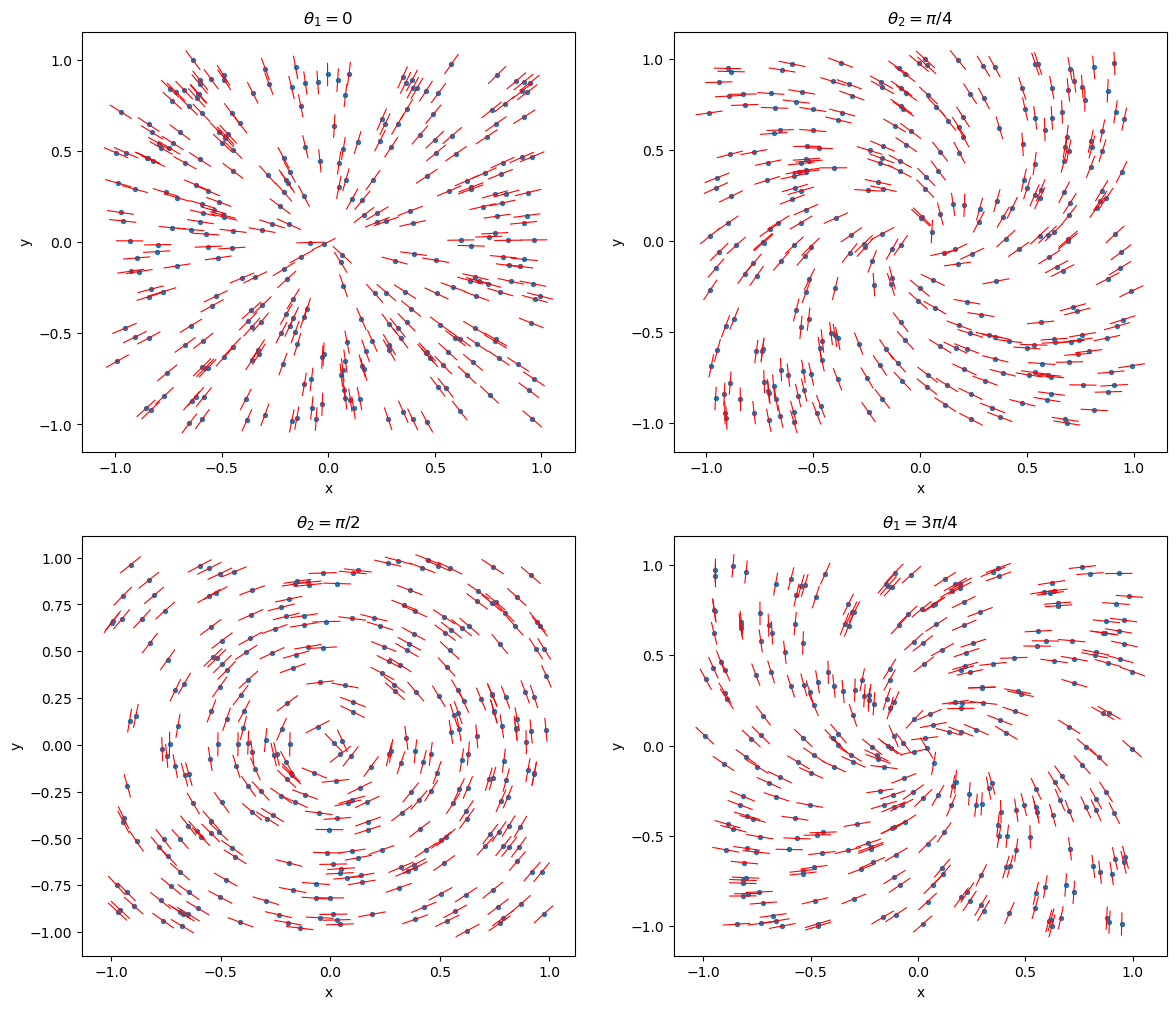

In [38]:
# PLOTTING all togheter

# plt.plot(x_values_a1, y_values_a1, 'r-', linewidth=.8)
# plt.scatter(rx1,ry1, s=8)
# plt.title(r'Galaxy shear orientation ($\theta_1 = 0$)')
# plt.show()

print('\n', r'                      Galaxy shear orientation from a gravitational lens')
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(x_values_a1, y_values_a1, 'r-', linewidth=.8)
axis[0, 0].scatter(rx1,ry1, s=8)
axis[0, 0].set_title(r'$\theta_1 = 0$')

axis[0, 1].plot(x_values_a2, y_values_a2, 'r-', linewidth=.8)
axis[0, 1].scatter(rx2,ry2, s=8)
axis[0, 1].set_title(r'$\theta_2 = \pi/4$')

# axis[0, 2].imshow(real_GRF3.real)
# axis[0, 2].set_title(r'Realization 3')

axis[1, 0].plot(x_values_a3, y_values_a3, 'r-', linewidth=.8)
axis[1, 0].scatter(rx3,ry3, s=8)
axis[1, 0].set_title(r'$\theta_2 = \pi/2$')

axis[1, 1].plot(x_values_a4, y_values_a4, 'r-', linewidth=.8)
axis[1, 1].scatter(rx4,ry4, s=8)
axis[1, 1].set_title(r'$\theta_1 = 3\pi/4$')

# axis[-1, -1].axis('off')

for ax in axis.flat:
    ax.set(xlabel='x', ylabel='y')

plt.rcParams["figure.figsize"] = (14,14)
plt.show()

### *Shear* 2PCF (for this four samples)

In [28]:
#### Sample 1

coord = np.zeros(Num*(Num-1)//2)
distance_xis_a1 = np.concatenate((coord.reshape(-1,1), coord.reshape(-1,1), coord.reshape(-1,1), coord.reshape(-1,1)), axis = 1)

n = 0

for i in range(Num):
    p1x1 = rx1[i]
    p1x2 = ry1[i]
    p1Absgamma_a1 = Absgshape_angle1[i]
    p1Anglegamma_a1 = Anglegshape_angle1[i]
    
    p1_gamma = p1Absgamma_a1*np.exp(2j*p1Anglegamma_a1)
    for m in range(i+1, Num):
        p2x1 = rx1[m]
        p2x2 = ry1[m]
        p2Absgamma_a1 = Absgshape_angle1[m]
        p2Anglegamma_a1 = Anglegshape_angle1[m]

        p2_gamma_a1 = p2Absgamma_a1*np.exp(2j*p2Anglegamma_a1)
        
        if (p2x1 - p1x1) != 0:
            angle_pair = np.arctan((p2x2 - p1x2)/(p2x1 - p1x1))
        else:
            angle_pair = np.pi/2
            
        p1_gammahelicity = -p1_gamma*np.exp(-2j*angle_pair)
        p2_gammahelicity = -p2_gamma*np.exp(-2j*angle_pair)
        
        p1_gamma_t = np.real(p1_gammahelicity)
        p1_gamma_X = np.imag(p1_gammahelicity)
        p2_gamma_t = np.real(p2_gammahelicity)
        p2_gamma_X = np.imag(p2_gammahelicity)
        
        distance = np.sqrt((p2x2 - p1x2)**2 + (p2x1 - p1x1)**2)
        
        xi_tt = p1_gamma_t*p2_gamma_t
        xi_xx = p1_gamma_X*p2_gamma_X
        xi_tx = p1_gamma_t*p2_gamma_X
        
        distance_xis_a1[n] = [distance, xi_tt, xi_xx, xi_tx]
        
        n += 1

# output
distance_xis_a1;

In [29]:
max_dist_a1 = np.max([distance_xis_a1[:,0], distance_xis_a1[:,1]])

list_a1 = np.zeros(bins3+1)
for i in range(bins3+1):
    list_a1[i] = max_dist_a1*i/bins3

hist_xitt_a1 = np.zeros(bins3)
hist_xixx_a1 = np.zeros(bins3)
hist_xitx_a1 = np.zeros(bins3)
num_bin_a1 = np.zeros(bins3)

for i in range(len(distance_xis_a1)):
    dist = distance_xis_a1[i, 0]
    xitt = distance_xis_a1[i, 1]
    xixx = distance_xis_a1[i, 2]
    xitx = distance_xis_a1[i, 3]
    for j in range(bins3):
        if (list_a1[j] < dist) and (dist <= list_a1[j+1]):
            hist_xitt_a1[j] = hist_xitt_a1[j] + xitt
            hist_xixx_a1[j] = hist_xixx_a1[j] + xixx
            hist_xitx_a1[j] = hist_xitx_a1[j] + xitx
            num_bin_a1[j] = num_bin_a1[j] + 1

hist_xitt_a1 = hist_xitt_a1/num_bin_a1
hist_xixx_a1 = hist_xixx_a1/num_bin_a1
hist_xitx_a1 = hist_xitx_a1/num_bin_a1

# output
xi_tt_xx_tx_a1 = np.concatenate((hist_xitt_a1.reshape(-1,1), hist_xixx_a1.reshape(-1,1), hist_xitx_a1.reshape(-1,1), num_bin_a1.reshape(-1,1)), axis = 1)
xi_tt_xx_tx_a1;

In [30]:
#### Sample 2

distance_xis_a2 = np.concatenate((coord.reshape(-1,1), coord.reshape(-1,1), coord.reshape(-1,1), coord.reshape(-1,1)), axis = 1)

n = 0

for i in range(Num):
    p1x1 = rx2[i]
    p1x2 = ry2[i]
    p1Absgamma_a2 = Absgshape_angle2[i]
    p1Anglegamma_a2 = Anglegshape_angle2[i]
    
    p1_gamma = p1Absgamma_a2*np.exp(2j*p1Anglegamma_a2)
    for m in range(i+1, Num):
        p2x1 = rx2[m]
        p2x2 = ry2[m]
        p2Absgamma_a2 = Absgshape_angle2[m]
        p2Anglegamma_a2 = Anglegshape_angle2[m]

        p2_gamma_a2 = p2Absgamma_a2*np.exp(2j*p2Anglegamma_a2)
        
        if (p2x1 - p1x1) != 0:
            angle_pair = np.arctan((p2x2 - p1x2)/(p2x1 - p1x1))
        else:
            angle_pair = np.pi/2
            
        p1_gammahelicity = -p1_gamma*np.exp(-2j*angle_pair)
        p2_gammahelicity = -p2_gamma*np.exp(-2j*angle_pair)
        
        p1_gamma_t = np.real(p1_gammahelicity)
        p1_gamma_X = np.imag(p1_gammahelicity)
        p2_gamma_t = np.real(p2_gammahelicity)
        p2_gamma_X = np.imag(p2_gammahelicity)
        
        distance = np.sqrt((p2x2 - p1x2)**2 + (p2x1 - p1x1)**2)
        
        xi_tt = p1_gamma_t*p2_gamma_t
        xi_xx = p1_gamma_X*p2_gamma_X
        xi_tx = p1_gamma_t*p2_gamma_X
        
        distance_xis_a2[n] = [distance, xi_tt, xi_xx, xi_tx]
        
        n += 1

# output
distance_xis_a2;

In [31]:
max_dist_a2 = np.max([distance_xis_a2[:,0], distance_xis_a2[:,1]])

list_a2 = np.zeros(bins3+1)
for i in range(bins3+1):
    list_a2[i] = max_dist_a2*i/bins3

hist_xitt_a2 = np.zeros(bins3)
hist_xixx_a2 = np.zeros(bins3)
hist_xitx_a2 = np.zeros(bins3)
num_bin_a2 = np.zeros(bins3)

for i in range(len(distance_xis_a2)):
    dist = distance_xis_a2[i, 0]
    xitt = distance_xis_a2[i, 1]
    xixx = distance_xis_a2[i, 2]
    xitx = distance_xis_a2[i, 3]
    for j in range(bins3):
        if (list_a2[j] < dist) and (dist <= list_a2[j+1]):
            hist_xitt_a2[j] = hist_xitt_a2[j] + xitt
            hist_xixx_a2[j] = hist_xixx_a2[j] + xixx
            hist_xitx_a2[j] = hist_xitx_a2[j] + xitx
            num_bin_a2[j] = num_bin_a2[j] + 1

hist_xitt_a2 = hist_xitt_a2/num_bin_a2
hist_xixx_a2 = hist_xixx_a2/num_bin_a2
hist_xitx_a2 = hist_xitx_a2/num_bin_a2

# output
xi_tt_xx_tx_a2 = np.concatenate((hist_xitt_a2.reshape(-1,1), hist_xixx_a2.reshape(-1,1), hist_xitx_a2.reshape(-1,1), num_bin_a2.reshape(-1,1)), axis = 1)
xi_tt_xx_tx_a2;

In [32]:
#### Sample 3

distance_xis_a3 = np.concatenate((coord.reshape(-1,1), coord.reshape(-1,1), coord.reshape(-1,1), coord.reshape(-1,1)), axis = 1)

n = 0

for i in range(Num):
    p1x1 = rx3[i]
    p1x2 = ry3[i]
    p1Absgamma_a3 = Absgshape_angle3[i]
    p1Anglegamma_a3 = Anglegshape_angle3[i]
    
    p1_gamma = p1Absgamma_a3*np.exp(2j*p1Anglegamma_a3)
    for m in range(i+1, Num):
        p2x1 = rx3[m]
        p2x2 = ry3[m]
        p2Absgamma_a3 = Absgshape_angle3[m]
        p2Anglegamma_a3 = Anglegshape_angle3[m]

        p2_gamma_a3 = p2Absgamma_a3*np.exp(2j*p2Anglegamma_a3)
        
        if (p2x1 - p1x1) != 0:
            angle_pair = np.arctan((p2x2 - p1x2)/(p2x1 - p1x1))
        else:
            angle_pair = np.pi/2
            
        p1_gammahelicity = -p1_gamma*np.exp(-2j*angle_pair)
        p2_gammahelicity = -p2_gamma*np.exp(-2j*angle_pair)
        
        p1_gamma_t = np.real(p1_gammahelicity)
        p1_gamma_X = np.imag(p1_gammahelicity)
        p2_gamma_t = np.real(p2_gammahelicity)
        p2_gamma_X = np.imag(p2_gammahelicity)
        
        distance = np.sqrt((p2x2 - p1x2)**2 + (p2x1 - p1x1)**2)
        
        xi_tt = p1_gamma_t*p2_gamma_t
        xi_xx = p1_gamma_X*p2_gamma_X
        xi_tx = p1_gamma_t*p2_gamma_X
        
        distance_xis_a3[n] = [distance, xi_tt, xi_xx, xi_tx]
        
        n += 1

# output
distance_xis_a3;

In [33]:
max_dist_a3 = np.max([distance_xis_a3[:,0], distance_xis_a3[:,1]])

list_a3 = np.zeros(bins3+1)
for i in range(bins3+1):
    list_a3[i] = max_dist_a3*i/bins3

hist_xitt_a3 = np.zeros(bins3)
hist_xixx_a3 = np.zeros(bins3)
hist_xitx_a3 = np.zeros(bins3)
num_bin_a3 = np.zeros(bins3)

for i in range(len(distance_xis_a3)):
    dist = distance_xis_a3[i, 0]
    xitt = distance_xis_a3[i, 1]
    xixx = distance_xis_a3[i, 2]
    xitx = distance_xis_a3[i, 3]
    for j in range(bins3):
        if (list_a3[j] < dist) and (dist <= list_a3[j+1]):
            hist_xitt_a3[j] = hist_xitt_a3[j] + xitt
            hist_xixx_a3[j] = hist_xixx_a3[j] + xixx
            hist_xitx_a3[j] = hist_xitx_a3[j] + xitx
            num_bin_a3[j] = num_bin_a3[j] + 1

hist_xitt_a3 = hist_xitt_a3/num_bin_a3
hist_xixx_a3 = hist_xixx_a3/num_bin_a3
hist_xitx_a3 = hist_xitx_a3/num_bin_a3

# output
xi_tt_xx_tx_a3 = np.concatenate((hist_xitt_a3.reshape(-1,1), hist_xixx_a3.reshape(-1,1), hist_xitx_a3.reshape(-1,1), num_bin_a3.reshape(-1,1)), axis = 1)
xi_tt_xx_tx_a3;

In [34]:
#### Sample 4

distance_xis_a4 = np.concatenate((coord.reshape(-1,1), coord.reshape(-1,1), coord.reshape(-1,1), coord.reshape(-1,1)), axis = 1)

n = 0

for i in range(Num):
    p1x1 = rx4[i]
    p1x2 = ry4[i]
    p1Absgamma_a4 = Absgshape_angle4[i]
    p1Anglegamma_a4 = Anglegshape_angle4[i]
    
    p1_gamma = p1Absgamma_a4*np.exp(2j*p1Anglegamma_a4)
    for m in range(i+1, Num):
        p2x1 = rx4[m]
        p2x2 = ry4[m]
        p2Absgamma_a4 = Absgshape_angle4[m]
        p2Anglegamma_a4 = Anglegshape_angle4[m]

        p2_gamma_a4 = p2Absgamma_a4*np.exp(2j*p2Anglegamma_a4)
        
        if (p2x1 - p1x1) != 0:
            angle_pair = np.arctan((p2x2 - p1x2)/(p2x1 - p1x1))
        else:
            angle_pair = np.pi/2
            
        p1_gammahelicity = -p1_gamma*np.exp(-2j*angle_pair)
        p2_gammahelicity = -p2_gamma*np.exp(-2j*angle_pair)
        
        p1_gamma_t = np.real(p1_gammahelicity)
        p1_gamma_X = np.imag(p1_gammahelicity)
        p2_gamma_t = np.real(p2_gammahelicity)
        p2_gamma_X = np.imag(p2_gammahelicity)
        
        distance = np.sqrt((p2x2 - p1x2)**2 + (p2x1 - p1x1)**2)
        
        xi_tt = p1_gamma_t*p2_gamma_t
        xi_xx = p1_gamma_X*p2_gamma_X
        xi_tx = p1_gamma_t*p2_gamma_X
        
        distance_xis_a4[n] = [distance, xi_tt, xi_xx, xi_tx]
        
        n += 1

# output
distance_xis_a4;

In [35]:
max_dist_a4 = np.max([distance_xis_a4[:,0], distance_xis_a4[:,1]])

list_a4 = np.zeros(bins3+1)
for i in range(bins3+1):
    list_a4[i] = max_dist_a4*i/bins3

hist_xitt_a4 = np.zeros(bins3)
hist_xixx_a4 = np.zeros(bins3)
hist_xitx_a4 = np.zeros(bins3)
num_bin_a4 = np.zeros(bins3)

for i in range(len(distance_xis_a4)):
    dist = distance_xis_a4[i, 0]
    xitt = distance_xis_a4[i, 1]
    xixx = distance_xis_a4[i, 2]
    xitx = distance_xis_a4[i, 3]
    for j in range(bins3):
        if (list_a4[j] < dist) and (dist <= list_a4[j+1]):
            hist_xitt_a4[j] = hist_xitt_a4[j] + xitt
            hist_xixx_a4[j] = hist_xixx_a4[j] + xixx
            hist_xitx_a4[j] = hist_xitx_a4[j] + xitx
            num_bin_a4[j] = num_bin_a4[j] + 1

hist_xitt_a4 = hist_xitt_a4/num_bin_a4
hist_xixx_a4 = hist_xixx_a4/num_bin_a4
hist_xitx_a4 = hist_xitx_a4/num_bin_a4

# output
xi_tt_xx_tx_a4 = np.concatenate((hist_xitt_a4.reshape(-1,1), hist_xixx_a4.reshape(-1,1), hist_xitx_a4.reshape(-1,1), num_bin_a4.reshape(-1,1)), axis = 1)
xi_tt_xx_tx_a4;


                       Shear correlation functions $\xi(\theta)$


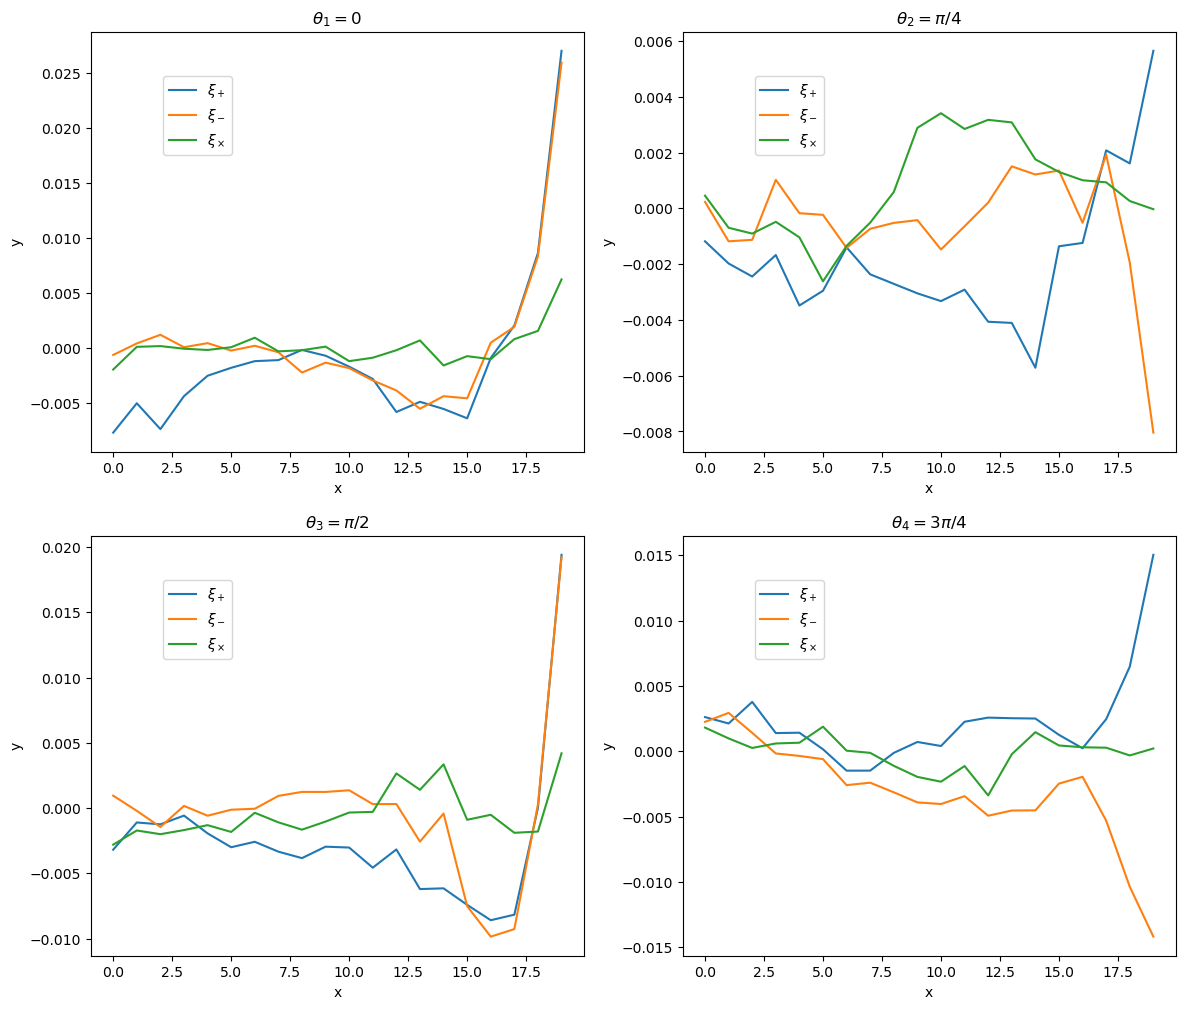

In [37]:
xis_a1 = xi_tt_xx_tx_a1
xis_a2 = xi_tt_xx_tx_a2
xis_a3 = xi_tt_xx_tx_a3
xis_a4 = xi_tt_xx_tx_a4

# PLOTTING 2PCF xi all togheter

print('\n', r'                      Shear correlation functions $\xi(\theta)$')
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(xis_a1[:,0] + xis_a1[:,1], label=r'$\xi_+$')
axis[0, 0].plot(xis_a1[:,0] - xis_a1[:,1], label=r'$\xi_-$')
axis[0, 0].plot(xis_a1[:,2], label=r'$\xi_\times$')
axis[0, 0].legend(loc='right',bbox_to_anchor=(0.3, 0.8))
axis[0, 0].set_title(r'$\theta_1 = 0$')
# axis[0, 0].ylim(-.05,.05)
# axis[0, 0].axis(ymin=-0.05,ymax=0.05)

axis[0, 1].plot(xis_a2[:,0] + xis_a2[:,1], label=r'$\xi_+$')
axis[0, 1].plot(xis_a2[:,0] - xis_a2[:,1], label=r'$\xi_-$')
axis[0, 1].plot(xis_a2[:,2], label=r'$\xi_\times$')
axis[0, 1].legend(loc='right',bbox_to_anchor=(0.3, 0.8))
axis[0, 1].set_title(r'$\theta_2 = \pi/4$')
# axis[0, 1].ylim(-.05,.05)
# axis[0, 1].axis(ymin=-0.05,ymax=0.05)

axis[1, 0].plot(xis_a3[:,0] + xis_a3[:,1], label=r'$\xi_+$')
axis[1, 0].plot(xis_a3[:,0] - xis_a3[:,1], label=r'$\xi_-$')
axis[1, 0].plot(xis_a3[:,2], label=r'$\xi_\times$')
axis[1, 0].legend(loc='right',bbox_to_anchor=(0.3, 0.8))
axis[1, 0].set_title(r'$\theta_3 = \pi/2$')
# axis[1, 0].ylim(-.05,.05)
# axis[1, 0].axis(ymin=-0.05,ymax=0.05)

axis[1, 1].plot(xis_a4[:,0] + xis_a4[:,1], label=r'$\xi_+$')
axis[1, 1].plot(xis_a4[:,0] - xis_a4[:,1], label=r'$\xi_-$')
axis[1, 1].plot(xis_a4[:,2], label=r'$\xi_\times$')
axis[1, 1].legend(loc='right',bbox_to_anchor=(0.3, 0.8))
axis[1, 1].set_title(r'$\theta_4 = 3\pi/4$')
# axis[1, 1].ylim(-.05,.05)
# axis[1, 1].axis(ymin=-0.05,ymax=0.05)

for ax in axis.flat:
    ax.set(xlabel='x', ylabel='y')

plt.rcParams["figure.figsize"] = (14,12)
plt.show()